# 4. Parkinson Disease Prediction

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import accuracy_score

In [ ]:
import pandas as pd
data_file_path = 'parkinsons.data'  
data = pd.read_csv(data_file_path, delimiter=',')
csv_file_path = 'parkinsons.csv'
data.to_csv(csv_file_path, index=False)


In [3]:
# loading the data from csv file to a Pandas DataFrame
parkinsons_data = pd.read_csv('parkinsons.csv')

In [4]:
parkinsons_data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [5]:
parkinsons_data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [6]:
# number of rows and columns in the dataframe
parkinsons_data.shape

(195, 24)

In [7]:
# getting more information about the dataset
parkinsons_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [8]:
# checking for missing values in each column
parkinsons_data.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [9]:
# getting some statistical measures about the data
parkinsons_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [25]:
parkinsons_data.corr()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.000000,0.400985,0.596546,-0.118003,-0.382027,-0.076194,-0.112165,-0.076213,-0.098374,-0.073742,...,-0.094732,-0.021981,0.059144,-0.383535,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356
MDVP:Fhi(Hz),0.400985,1.000000,0.084951,0.102086,-0.029198,0.097177,0.091126,0.097150,0.002281,0.043465,...,-0.003733,0.163766,-0.024893,-0.166136,-0.112404,-0.343097,-0.076658,-0.002954,0.176323,-0.069543
MDVP:Flo(Hz),0.596546,0.084951,1.000000,-0.139919,-0.277815,-0.100519,-0.095828,-0.100488,-0.144543,-0.119089,...,-0.150737,-0.108670,0.210851,-0.380200,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071
MDVP:Jitter(%),-0.118003,0.102086,-0.139919,1.000000,0.935714,0.990276,0.974256,0.990276,0.769063,0.804289,...,0.746635,0.906959,-0.728165,0.278220,0.360673,0.098572,0.693577,0.385123,0.433434,0.721543
MDVP:Jitter(Abs),-0.382027,-0.029198,-0.277815,0.935714,1.000000,0.922911,0.897778,0.922913,0.703322,0.716601,...,0.697170,0.834972,-0.656810,0.338653,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162
MDVP:RAP,-0.076194,0.097177,-0.100519,0.990276,0.922911,1.000000,0.957317,1.000000,0.759581,0.790652,...,0.744919,0.919521,-0.721543,0.266668,0.342140,0.064083,0.648328,0.324407,0.426605,0.670999
MDVP:PPQ,-0.112165,0.091126,-0.095828,0.974256,0.897778,0.957317,1.000000,0.957319,0.797826,0.839239,...,0.763592,0.844604,-0.731510,0.288698,0.333274,0.196301,0.716489,0.407605,0.412524,0.769647
Jitter:DDP,-0.076213,0.097150,-0.100488,0.990276,0.922913,1.000000,0.957319,1.000000,0.759555,0.790621,...,0.744901,0.919548,-0.721494,0.266646,0.342079,0.064026,0.648328,0.324377,0.426556,0.671005
MDVP:Shimmer,-0.098374,0.002281,-0.144543,0.769063,0.703322,0.759581,0.797826,0.759555,1.000000,0.987258,...,0.987626,0.722194,-0.835271,0.367430,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771
MDVP:Shimmer(dB),-0.073742,0.043465,-0.119089,0.804289,0.716601,0.790652,0.839239,0.790621,0.987258,1.000000,...,0.963202,0.744477,-0.827805,0.350697,0.410684,0.165157,0.652547,0.454314,0.512233,0.695058


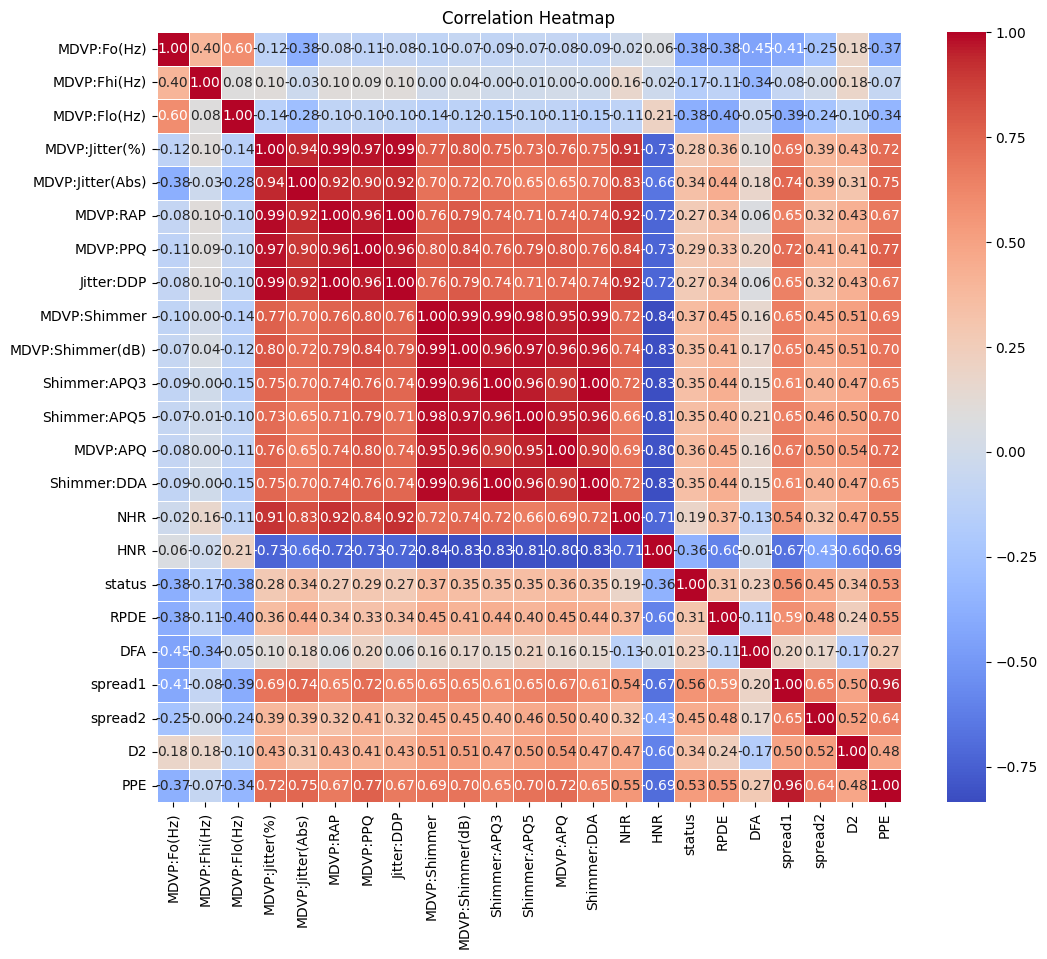

In [26]:
import matplotlib.pyplot as plt 
import seaborn as sns
correlation_matrix = parkinsons_data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [12]:
# distribution of target Variable
parkinsons_data['status'].value_counts()

status
1    147
0     48
Name: count, dtype: int64

In [13]:
parkinsons_data.drop(parkinsons_data.columns[0], axis=1,inplace=True)

In [14]:
parkinsons_data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [15]:
# grouping the data bas3ed on the target variable
parkinsons_data.groupby('status').mean()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,
0,181.937771,223.636750,145.207292,0.003866,0.000023,0.001925,0.002056,0.005776,0.017615,0.162958,...,0.013305,0.028511,0.011483,24.678750,0.442552,0.695716,-6.759264,0.160292,2.154491,0.123017
1,145.180762,188.441463,106.893558,0.006989,0.000051,0.003757,0.003900,0.011273,0.033658,0.321204,...,0.027600,0.053027,0.029211,20.974048,0.516816,0.725408,-5.333420,0.248133,2.456058,0.233828


In [16]:
X = parkinsons_data.drop(columns=['status'], axis=1)
Y = parkinsons_data['status']

In [17]:
X

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,...,0.02745,0.07008,0.02764,19.517,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,...,0.01879,0.04812,0.01810,19.147,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,...,0.01667,0.03804,0.10715,17.883,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,...,0.01588,0.03794,0.07223,19.020,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [18]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [20]:
print(X.shape, X_train.shape, X_test.shape)

(195, 22) (156, 22) (39, 22)


In [21]:
scaler = StandardScaler()

In [22]:
scaler.fit(X_train)

StandardScaler()

In [23]:
X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)

In [24]:
print(X_train)

[[ 0.63239631 -0.02731081 -0.87985049 ... -0.97586547 -0.55160318
   0.07769494]
 [-1.05512719 -0.83337041 -0.9284778  ...  0.3981808  -0.61014073
   0.39291782]
 [ 0.02996187 -0.29531068 -1.12211107 ... -0.43937044 -0.62849605
  -0.50948408]
 ...
 [-0.9096785  -0.6637302  -0.160638   ...  1.22001022 -0.47404629
  -0.2159482 ]
 [-0.35977689  0.19731822 -0.79063679 ... -0.17896029 -0.47272835
   0.28181221]
 [ 1.01957066  0.19922317 -0.61914972 ... -0.716232    1.23632066
  -0.05829386]]


### Support Vector Machine

In [27]:
model = svm.SVC(kernel='linear')

In [28]:
# training the SVM model with training data
model.fit(X_train, Y_train)

SVC(kernel='linear')

In [29]:
# accuracy score on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of training data : ', training_data_accuracy)
svm_train = training_data_accuracy

Accuracy score of training data :  0.8846153846153846


In [30]:
# accuracy score on training data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of test data : ', test_data_accuracy)
svm_test = test_data_accuracy

Accuracy score of test data :  0.8717948717948718


In [31]:
input_data = (197.07600,206.89600,192.05500,0.00289,0.00001,0.00166,0.00168,0.00498,0.01098,0.09700,0.00563,0.00680,0.00802,0.01689,0.00339,26.77500,0.422229,0.741367,-7.348300,0.177551,1.743867,0.085569)

# changing input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the data
std_data = scaler.transform(input_data_reshaped)

prediction = model.predict(std_data)
print(prediction)


if (prediction[0] == 0):
  print("The Person does not have Parkinsons Disease")

else:
  print("The Person has Parkinsons")

[0]
The Person does not have Parkinsons Disease


c:\Users\ntsur\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [33]:
from sklearn.metrics import classification_report
svm_classification_report = classification_report(Y_test, X_test_prediction)
print("Support Vector Machine Classification Report:")
print(svm_classification_report)

Support Vector Machine Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.62      0.67         8
           1       0.91      0.94      0.92        31

    accuracy                           0.87        39
   macro avg       0.81      0.78      0.79        39
weighted avg       0.87      0.87      0.87        39



### Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

In [36]:
train_predictions = model.predict(X_train)
training_accuracy = accuracy_score(Y_train, train_predictions)
print('Accuracy on training data:', training_accuracy)
log_train = training_accuracy 

Accuracy on training data: 0.8717948717948718


In [37]:
test_predictions = model.predict(X_test)
test_accuracy = accuracy_score(Y_test, test_predictions)
print('Accuracy on test data:', test_accuracy)
log_test = test_accuracy

Accuracy on test data: 0.8205128205128205


In [38]:
input_data = np.array([197.07600, 206.89600, 192.05500, 0.00289, 0.00001, 0.00166, 0.00168, 
                       0.00498, 0.01098, 0.09700, 0.00563, 0.00680, 0.00802, 0.01689, 
                       0.00339, 26.77500, 0.422229, 0.741367, -7.348300, 0.177551, 
                       1.743867, 0.085569]).reshape(1, -1)

# Standardize the input data
std_input_data = scaler.transform(input_data)

# Predict using the trained model
prediction = model.predict(std_input_data)

# Print prediction
if prediction[0] == 0:
    print("The person does not have Parkinson's disease.")
else:
    print("The person has Parkinson's disease.")

The person does not have Parkinson's disease.


c:\Users\ntsur\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [39]:
logistic_classification_report = classification_report(Y_test, test_predictions)
print("\nLogistic Regression Classification Report:")
print(logistic_classification_report)


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.62      0.59         8
           1       0.90      0.87      0.89        31

    accuracy                           0.82        39
   macro avg       0.73      0.75      0.74        39
weighted avg       0.83      0.82      0.82        39



### Decision Trees

In [40]:
from sklearn.tree import DecisionTreeClassifier

In [41]:
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)

DecisionTreeClassifier()

In [42]:
train_predictions = model.predict(X_train)
training_accuracy = accuracy_score(Y_train, train_predictions)
print('Accuracy on training data:', training_accuracy)
decision_train = training_accuracy

Accuracy on training data: 1.0


In [43]:
test_predictions = model.predict(X_test)
test_accuracy = accuracy_score(Y_test, test_predictions)
print('Accuracy on test data:', test_accuracy)
decision_test = test_accuracy

Accuracy on test data: 0.7435897435897436


In [44]:
# Example input data
input_data = np.array([197.07600, 206.89600, 192.05500, 0.00289, 0.00001, 0.00166, 0.00168, 
                       0.00498, 0.01098, 0.09700, 0.00563, 0.00680, 0.00802, 0.01689, 
                       0.00339, 26.77500, 0.422229, 0.741367, -7.348300, 0.177551, 
                       1.743867, 0.085569]).reshape(1, -1)

# Standardize the input data
std_input_data = scaler.transform(input_data)

# Predict using the trained model
prediction = model.predict(std_input_data)

# Print prediction
if prediction[0] == 0:
    print("The person does not have Parkinson's disease.")
else:
    print("The person has Parkinson's disease.")

The person does not have Parkinson's disease.


c:\Users\ntsur\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [45]:
decision_tree_classification_report = classification_report(Y_test, test_predictions)
print("\nDecision Trees Classification Report:")
print(decision_tree_classification_report)


Decision Trees Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.88      0.58         8
           1       0.96      0.71      0.81        31

    accuracy                           0.74        39
   macro avg       0.70      0.79      0.70        39
weighted avg       0.85      0.74      0.77        39



### Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
model = RandomForestClassifier(n_estimators=100, random_state=2)
model.fit(X_train, Y_train)

RandomForestClassifier(random_state=2)

In [48]:
train_predictions = model.predict(X_train)
training_accuracy = accuracy_score(Y_train, train_predictions)
print('Accuracy on training data:', training_accuracy)
randomforest_train = training_accuracy

Accuracy on training data: 1.0


In [49]:
test_predictions = model.predict(X_test)
test_accuracy = accuracy_score(Y_test, test_predictions)
print('Accuracy on test data:', test_accuracy)
randomforest_test = test_accuracy

Accuracy on test data: 0.8205128205128205


In [50]:
input_data = np.array([197.07600, 206.89600, 192.05500, 0.00289, 0.00001, 0.00166, 0.00168, 
                       0.00498, 0.01098, 0.09700, 0.00563, 0.00680, 0.00802, 0.01689, 
                       0.00339, 26.77500, 0.422229, 0.741367, -7.348300, 0.177551, 
                       1.743867, 0.085569]).reshape(1, -1)

# Standardize the input data
std_input_data = scaler.transform(input_data)

# Predict using the trained model
prediction = model.predict(std_input_data)

# Print prediction
if prediction[0] == 0:
    print("The person does not have Parkinson's disease.")
else:
    print("The person has Parkinson's disease.")

The person does not have Parkinson's disease.


c:\Users\ntsur\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [51]:
random_forest_classification_report = classification_report(Y_test, test_predictions)
print("\nRandom Forest Classification Report:")
print(random_forest_classification_report)


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.62      0.59         8
           1       0.90      0.87      0.89        31

    accuracy                           0.82        39
   macro avg       0.73      0.75      0.74        39
weighted avg       0.83      0.82      0.82        39



### KNN

In [52]:
from sklearn.neighbors import KNeighborsClassifier

In [53]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, Y_train)

KNeighborsClassifier()

In [54]:
train_predictions = model.predict(X_train)
training_accuracy = accuracy_score(Y_train, train_predictions)
print('Accuracy on training data:', training_accuracy)
knn_train = training_accuracy

Accuracy on training data: 0.967948717948718


In [55]:
test_predictions = model.predict(X_test)
test_accuracy = accuracy_score(Y_test, test_predictions)
print('Accuracy on test data:', test_accuracy)
knn_test = test_accuracy

Accuracy on test data: 0.7692307692307693


In [56]:
input_data = np.array([197.07600, 206.89600, 192.05500, 0.00289, 0.00001, 0.00166, 0.00168, 
                       0.00498, 0.01098, 0.09700, 0.00563, 0.00680, 0.00802, 0.01689, 
                       0.00339, 26.77500, 0.422229, 0.741367, -7.348300, 0.177551, 
                       1.743867, 0.085569]).reshape(1, -1)

# Standardize the input data
std_input_data = scaler.transform(input_data)

# Predict using the trained model
prediction = model.predict(std_input_data)

# Print prediction
if prediction[0] == 0:
    print("The person does not have Parkinson's disease.")
else:
    print("The person has Parkinson's disease.")

The person does not have Parkinson's disease.


c:\Users\ntsur\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [57]:
knn_classification_report = classification_report(Y_test, test_predictions)
print("\nK-Nearest Neighbors Classification Report:")
print(knn_classification_report)



K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.75      0.57         8
           1       0.92      0.77      0.84        31

    accuracy                           0.77        39
   macro avg       0.69      0.76      0.71        39
weighted avg       0.83      0.77      0.79        39



### Neural Network

In [58]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [59]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [60]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
5/5 [==============================] - 1s 2ms/step - loss: 0.7059 - accuracy: 0.4551
Epoch 2/50
5/5 [==============================] - 0s 3ms/step - loss: 0.6482 - accuracy: 0.5641
Epoch 3/50
5/5 [==============================] - 0s 1ms/step - loss: 0.5971 - accuracy: 0.6603
Epoch 4/50
5/5 [==============================] - 0s 2ms/step - loss: 0.5589 - accuracy: 0.6795
Epoch 5/50
5/5 [==============================] - 0s 2ms/step - loss: 0.5273 - accuracy: 0.7244
Epoch 6/50
5/5 [==============================] - 0s 3ms/step - loss: 0.5014 - accuracy: 0.7244
Epoch 7/50
5/5 [==============================] - 0s 3ms/step - loss: 0.4794 - accuracy: 0.7564
Epoch 8/50
5/5 [==============================] - 0s 3ms/step - loss: 0.4606 - accuracy: 0.7628
Epoch 9/50
5/5 [==============================] - 0s 3ms/step - loss: 0.4446 - accuracy: 0.7564
Epoch 10/50
5/5 [==============================] - 0s 1ms/step - loss: 0.4297 - accuracy: 0.7564
Epoch 11/50
5/5 [======================

In [61]:
train_loss, train_accuracy = model.evaluate(X_train, Y_train, verbose=0)
test_loss, test_accuracy = model.evaluate(X_test, Y_test, verbose=0)

In [62]:
print('Accuracy on training data:', train_accuracy)
print('Accuracy on test data:', test_accuracy)
nn_train = train_accuracy
nn_test = test_accuracy

Accuracy on training data: 0.9551281929016113
Accuracy on test data: 0.7435897588729858


In [63]:
input_data = np.array([197.07600, 206.89600, 192.05500, 0.00289, 0.00001, 0.00166, 0.00168, 
                       0.00498, 0.01098, 0.09700, 0.00563, 0.00680, 0.00802, 0.01689, 
                       0.00339, 26.77500, 0.422229, 0.741367, -7.348300, 0.177551, 
                       1.743867, 0.085569]).reshape(1, -1)

# Standardize the input data
std_input_data = scaler.transform(input_data)

# Predict using the trained model
prediction = model.predict(std_input_data)

# Print prediction
if prediction[0] < 0.5:
    print("The person does not have Parkinson's disease.")
else:
    print("The person has Parkinson's disease.")

1/1 [==============================] - 0s 88ms/step
The person does not have Parkinson's disease.


c:\Users\ntsur\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [64]:
nn_classification_report = classification_report(Y_test, (model.predict(X_test) > 0.5).astype("int32"))
print("\nNeural Network Classification Report:")
print(nn_classification_report)

2/2 [==============================] - 0s 2ms/step

Neural Network Classification Report:
              precision    recall  f1-score   support

           0       0.43      0.75      0.55         8
           1       0.92      0.74      0.82        31

    accuracy                           0.74        39
   macro avg       0.67      0.75      0.68        39
weighted avg       0.82      0.74      0.76        39



In [65]:
accuracy_data = {
    'Model': ['Support Vector Machine (SVM)', 'Logistic Regression', 'Decision Tree', 
              'Random Forest', 'K-Nearest Neighbors (KNN)', 'Neural Network'],
    'Training Accuracy': [svm_train, log_train, decision_train, 
                          randomforest_train, knn_train, nn_train],
    'Test Accuracy': [svm_test, log_test, decision_test, 
                      randomforest_test, knn_test, nn_test]
}

accuracy_df = pd.DataFrame(accuracy_data)
print(accuracy_df)

                          Model  Training Accuracy  Test Accuracy
0  Support Vector Machine (SVM)           0.884615       0.871795
1           Logistic Regression           0.871795       0.820513
2                 Decision Tree           1.000000       0.743590
3                 Random Forest           1.000000       0.820513
4     K-Nearest Neighbors (KNN)           0.967949       0.769231
5                Neural Network           0.955128       0.743590


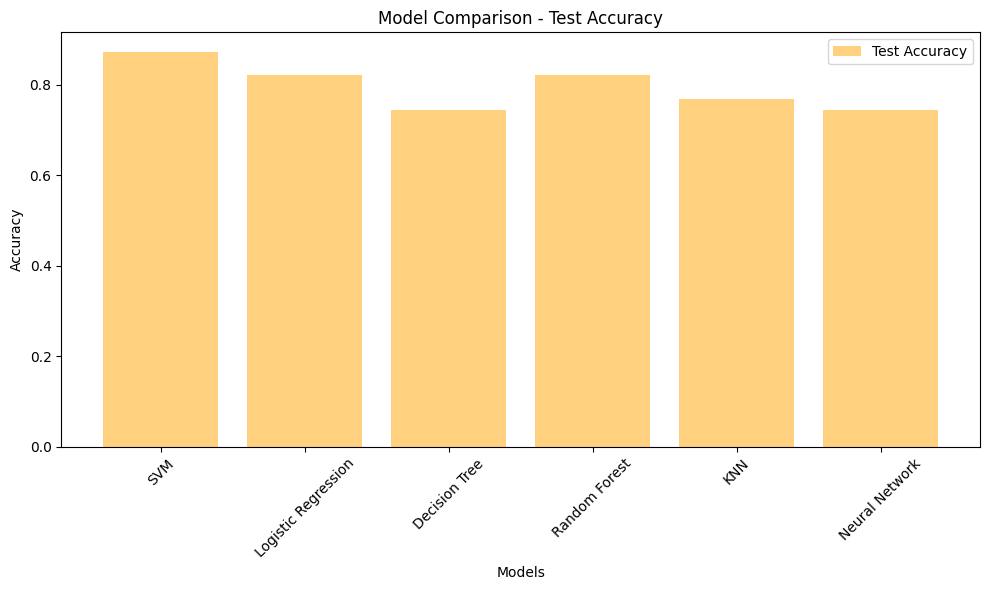

In [66]:

models = ['SVM', 'Logistic Regression', 'Decision Tree', 'Random Forest', 'KNN', 'Neural Network']
test_accuracy = [svm_test, log_test, decision_test, randomforest_test, knn_test, nn_test]

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(models, test_accuracy, color='orange', alpha=0.5, label='Test Accuracy')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Comparison - Test Accuracy')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [67]:
import pickle
with open('svm_model.pkl', 'wb') as file:
    pickle.dump(model, file)
